# Importing Libraries and Dataste

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from IPython.display import display
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Importing dataset
df = pd.read_excel("dataset.xlsx")

In [3]:
df

,Sexe,Decision,Age,Etio,CV,Esterman,ST,DT_centrale,DT_laterales,DT_quadsupg,...,DT_dis_quadsupd,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_Gauche,DT_dis_Droite,Resultat ST,Resultat DT Central,Résultat DT latéral,Resultat Dis_Centrale,Resultat dis_laterales
0,F,Non,33,Vas,HLH_D,45,0,3,36,3,...,12,10,17.0,20,29,1,1,0,1,0
1,F,Oui,40,Vas,HLH_D,48,1,3,2,0,...,2,4,5.0,5,7,1,1,1,0,1
2,H,Simulateur,52,Tum,HLH_D,42,0,3,14,1,...,3,5,10.0,8,13,1,1,0,1,0
3,H,Non,37,Vas,HLH_D,40,1,1,19,1,...,11,6,10.0,8,21,1,1,0,1,0
4,H,Non,39,TC,HLH_G,47,0,1,23,13,...,1,10,1.0,17,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,H,Oui,55,Vas,Scotome_D,1,1,4,1,1,...,0,1,1.0,1,1,1,1,1,1,1
250,F,Non,66,Tum,Scotome_G,0,0,1,3,1,...,4,6,6.0,10,10,1,1,1,1,0
251,H,Oui,46,Vas,Scotome_G,1,0,2,3,2,...,0,1,0.0,2,0,1,1,1,1,1
252,F,Non,63,Vas,Scotome_G,27,1,2,8,8,...,1,4,3.0,9,4,1,1,0,1,0


In [4]:
df.columns

Index(['Sexe', 'Decision', 'Age', 'Etio', 'CV', 'Esterman', 'ST',
       'DT_centrale', 'DT_laterales', 'DT_quadsupg', 'DT_quadsupd',
       'DT_quadinfg', 'DT_quadinfd', 'DT_Gauche', 'DT_Droite',
       'DT_dis_Centrale', 'DT_dis_laterales', 'DT_dis_quadsupg',
       'DT_dis_quadsupd', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_Gauche', 'DT_dis_Droite', 'Resultat ST', 'Resultat DT Central',
       'Résultat DT latéral', 'Resultat Dis_Centrale',
       'Resultat dis_laterales'],
      dtype='object')

# Data Pre-processing

In [5]:
df.describe()

,Age,Esterman,ST,DT_centrale,DT_laterales,DT_quadsupg,DT_quadsupd,DT_quadinfg,DT_quadinfd,DT_Gauche,...,DT_dis_quadsupd,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_Gauche,DT_dis_Droite,Resultat ST,Resultat DT Central,Résultat DT latéral,Resultat Dis_Centrale,Resultat dis_laterales
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,254.000000,254.000000,253.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,50.031496,13.854331,0.688976,4.039370,10.023622,2.649606,2.488189,2.492126,2.330709,5.141732,...,4.318898,5.173228,5.102767,9.842520,9.401575,0.944882,0.913386,0.535433,0.783465,0.460630
std,15.629068,15.932864,0.941845,3.655959,10.472599,4.010764,3.704214,4.198383,4.349467,7.232693,...,4.428246,4.584894,5.041624,8.450671,8.665282,0.228661,0.281824,0.499728,0.412696,0.499432
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,50.000000,8.000000,0.000000,3.000000,6.500000,1.000000,1.000000,1.000000,0.000000,2.500000,...,2.500000,4.000000,3.000000,7.000000,7.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,62.000000,23.000000,1.000000,5.000000,14.000000,3.000000,3.000000,3.000000,2.000000,6.000000,...,7.000000,8.000000,8.000000,16.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,85.000000,71.000000,5.000000,23.000000,52.000000,18.000000,17.000000,18.000000,18.000000,36.000000,...,18.000000,18.000000,18.000000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sexe                    254 non-null    object 
 1   Decision                244 non-null    object 
 2   Age                     254 non-null    int64  
 3   Etio                    254 non-null    object 
 4   CV                      254 non-null    object 
 5   Esterman                254 non-null    int64  
 6   ST                      254 non-null    int64  
 7   DT_centrale             254 non-null    int64  
 8   DT_laterales            254 non-null    int64  
 9   DT_quadsupg             254 non-null    int64  
 10  DT_quadsupd             254 non-null    int64  
 11  DT_quadinfg             254 non-null    int64  
 12  DT_quadinfd             254 non-null    int64  
 13  DT_Gauche               254 non-null    int64  
 14  DT_Droite               254 non-null    in

In [7]:
df.Decision.value_counts()

Non           128
Oui            91
Simulateur     25
Name: Decision, dtype: int64

In [8]:
## Checking for NaN or Null values in the dataset
nan_col_vals = df.isnull().sum()

In [9]:
# Counting NaN values for each column
nan_col_vals

Sexe                       0
Decision                  10
Age                        0
Etio                       0
CV                         0
Esterman                   0
ST                         0
DT_centrale                0
DT_laterales               0
DT_quadsupg                0
DT_quadsupd                0
DT_quadinfg                0
DT_quadinfd                0
DT_Gauche                  0
DT_Droite                  0
DT_dis_Centrale            0
DT_dis_laterales           0
DT_dis_quadsupg            0
DT_dis_quadsupd            0
DT_dis_quadinfg            0
DT_dis_quadinfd            1
DT_dis_Gauche              0
DT_dis_Droite              0
Resultat ST                0
Resultat DT Central        0
Résultat DT latéral        0
Resultat Dis_Centrale      0
Resultat dis_laterales     0
dtype: int64

In [10]:
df.loc[ df.DT_dis_quadinfd.isna() ]

,Sexe,Decision,Age,Etio,CV,Esterman,ST,DT_centrale,DT_laterales,DT_quadsupg,...,DT_dis_quadsupd,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_Gauche,DT_dis_Droite,Resultat ST,Resultat DT Central,Résultat DT latéral,Resultat Dis_Centrale,Resultat dis_laterales
119,F,Oui,68,Vas,N,0,0,4,1,0,...,1,2,NaN,4,1,1,1,1,1,1


In [11]:
# At the moment, let's consider dropping all the lines with NaN vals
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

In [12]:
df.isna().sum()

Sexe                      0
Decision                  0
Age                       0
Etio                      0
CV                        0
Esterman                  0
ST                        0
DT_centrale               0
DT_laterales              0
DT_quadsupg               0
DT_quadsupd               0
DT_quadinfg               0
DT_quadinfd               0
DT_Gauche                 0
DT_Droite                 0
DT_dis_Centrale           0
DT_dis_laterales          0
DT_dis_quadsupg           0
DT_dis_quadsupd           0
DT_dis_quadinfg           0
DT_dis_quadinfd           0
DT_dis_Gauche             0
DT_dis_Droite             0
Resultat ST               0
Resultat DT Central       0
Résultat DT latéral       0
Resultat Dis_Centrale     0
Resultat dis_laterales    0
dtype: int64

In [13]:
# Listing all the columns in the dataframe
df.columns

Index(['Sexe', 'Decision', 'Age', 'Etio', 'CV', 'Esterman', 'ST',
       'DT_centrale', 'DT_laterales', 'DT_quadsupg', 'DT_quadsupd',
       'DT_quadinfg', 'DT_quadinfd', 'DT_Gauche', 'DT_Droite',
       'DT_dis_Centrale', 'DT_dis_laterales', 'DT_dis_quadsupg',
       'DT_dis_quadsupd', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_Gauche', 'DT_dis_Droite', 'Resultat ST', 'Resultat DT Central',
       'Résultat DT latéral', 'Resultat Dis_Centrale',
       'Resultat dis_laterales'],
      dtype='object')

In [14]:
'''
    There is a problem with the values of some categorical features where a charcter '\xa0' is added to the end of them!
    Example: Etio column
'''
# Etio column
df.Etio.value_counts()

Vas        160
TC          41
Tum         27
Vas          6
TC_Vas       4
TC           3
Tum          1
Vas_Tum      1
Name: Etio, dtype: int64

In [15]:
'''
    We solve this for all the values in the columns of the dataset as follows:
'''
df.replace(u'\xa0', u'', regex=True, inplace = True)

In [16]:
# Etio Column after removing the character '\xa0'
df.Etio.value_counts()

Vas        166
TC          44
Tum         28
TC_Vas       4
Vas_Tum      1
Name: Etio, dtype: int64

In [17]:
# CV Column
df.CV.value_counts()

N               111
HLH_D            21
HLH_G            21
Quadra_inf_D     20
Quadra_sup_D     19
Quadra_sup_G     17
Scotome_D        12
Quadra_inf_G     11
Scotome_G         9
Quadra sup D      1
Scotomel_G        1
Name: CV, dtype: int64

In [18]:
# Fixing the problem with some categories of CV column
df.loc[ (df.CV == 'Scotomel_G'), 'CV'] = 'Scotome_G'
df.loc[ (df.CV == 'Quadra sup D'), 'CV'] = 'Quadra_sup_D'

In [19]:
df.loc[ df.CV == 'Quadra sup D' ].CV

Series([], Name: CV, dtype: object)

In [20]:
# CV Column
df.CV.value_counts()

N               111
HLH_D            21
HLH_G            21
Quadra_inf_D     20
Quadra_sup_D     20
Quadra_sup_G     17
Scotome_D        12
Quadra_inf_G     11
Scotome_G        10
Name: CV, dtype: int64

In [21]:
# Sexe Column
df.Sexe.value_counts()

H    145
F     98
Name: Sexe, dtype: int64

array([<Axes: title={'center': 'F'}>, <Axes: title={'center': 'H'}>],
      dtype=object)

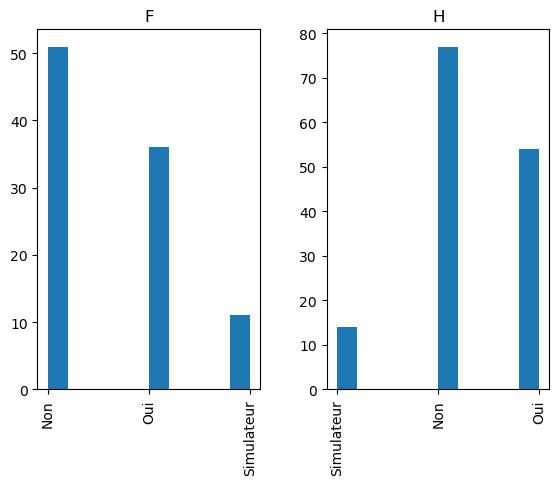

In [22]:
df.Decision.hist(by = df.Sexe)

In [23]:
# Decision Column
df.Decision.value_counts()

Non           128
Oui            90
Simulateur     25
Name: Decision, dtype: int64

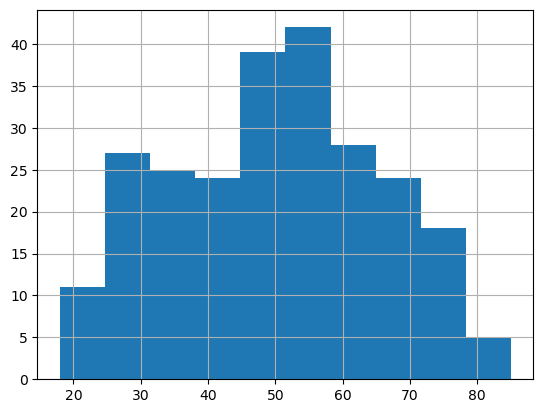

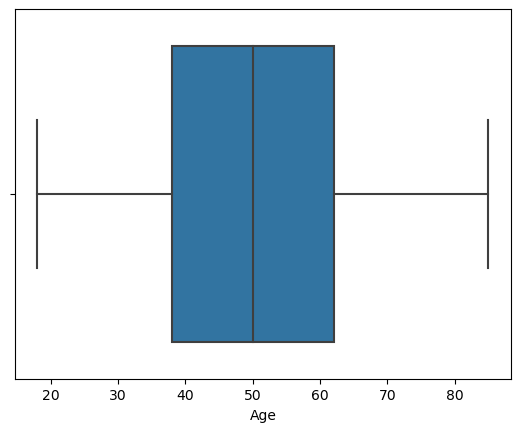

In [24]:
# Age Column
df.Age.hist()
plt.show()
sns.boxplot(x = df.Age)
plt.show()

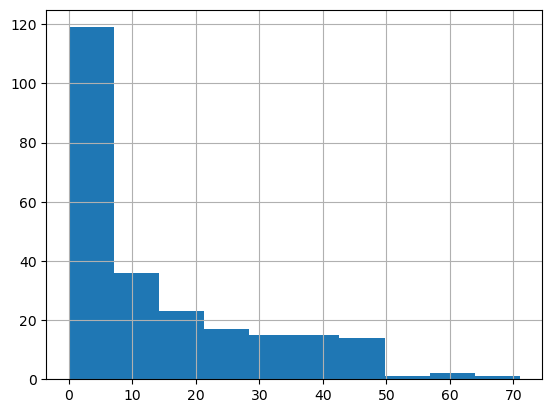

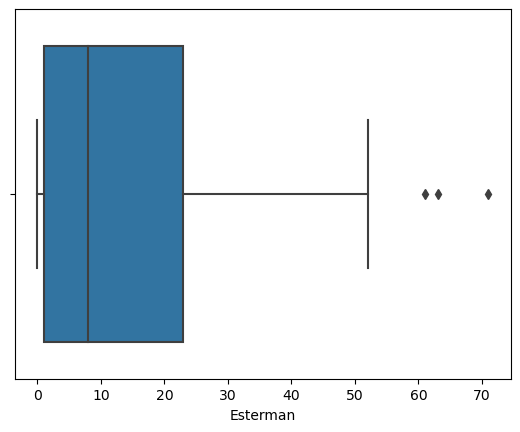

In [25]:
# Esterman Column
df.Esterman.hist()
plt.show()
sns.boxplot(x = df.Esterman)
plt.show()

In [26]:
# ST Column
df.ST.value_counts()

0    131
1     77
2     22
3     10
5      2
4      1
Name: ST, dtype: int64

<Axes: >

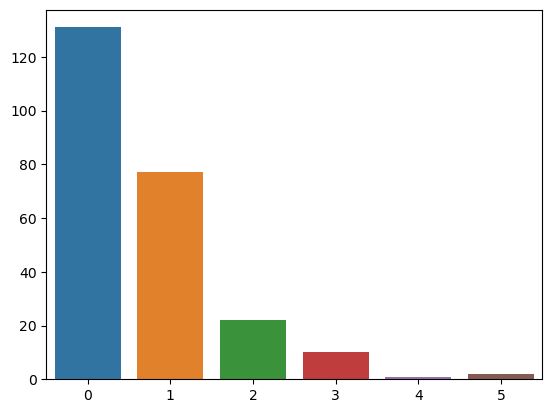

In [27]:
# ST Column
sns.barplot(x = df.ST.value_counts().index, y = df.ST.value_counts().values)

<Axes: >

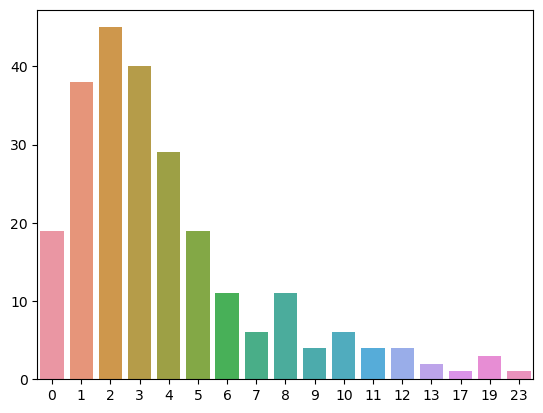

In [28]:
# DT_centrale Column
sns.barplot(x = df.DT_centrale.value_counts().index, y = df.DT_centrale.value_counts().values)

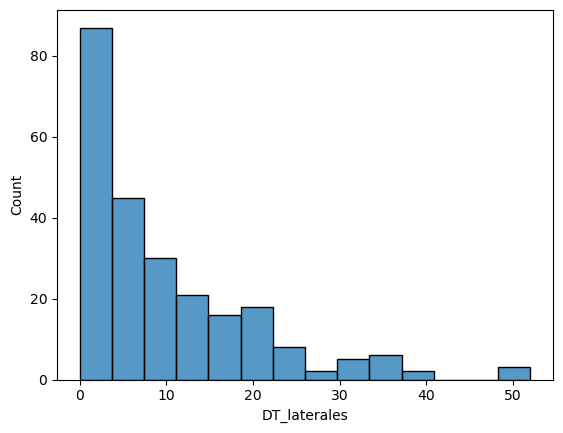

In [29]:
# DT_laterales Column
sns.histplot(df.DT_laterales)
plt.show()

Histogram plot:  DT_quadsupg


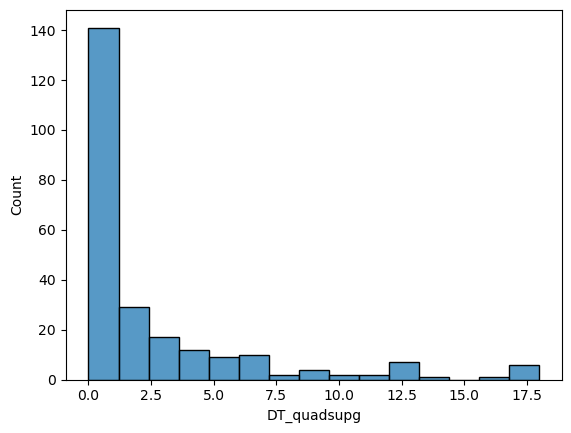

Histogram plot:  DT_quadsupd


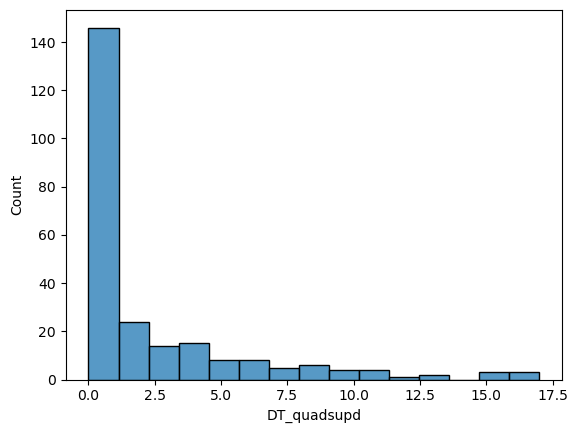

Histogram plot:  DT_quadinfg


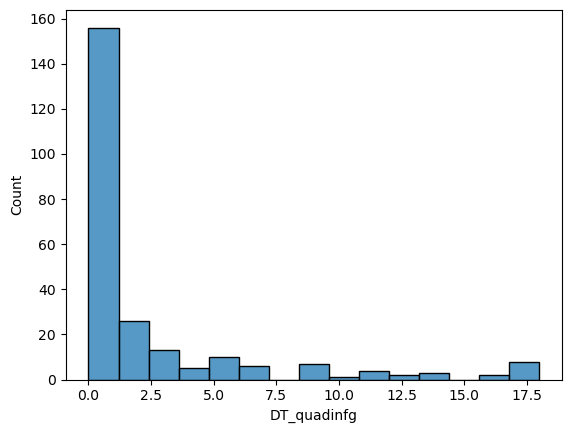

Histogram plot:  DT_quadinfd


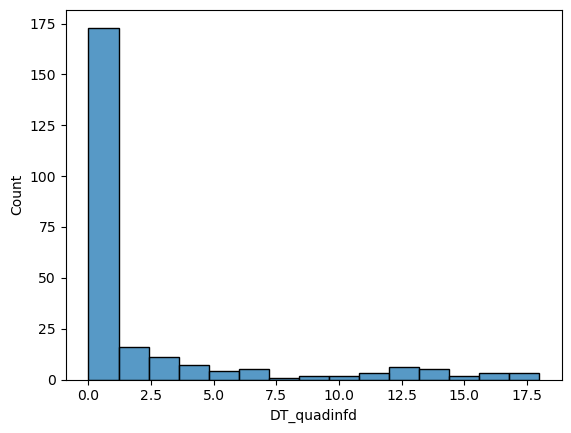

Histogram plot:  DT_Gauche


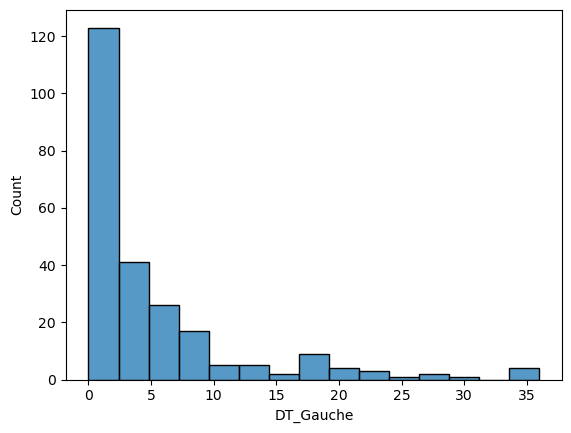

Histogram plot:  DT_Droite


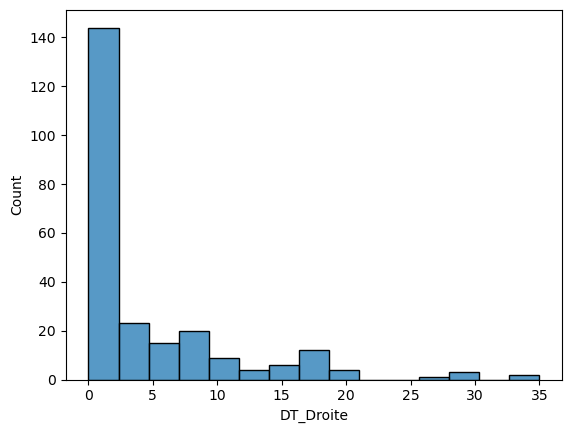

Histogram plot:  DT_dis_Centrale


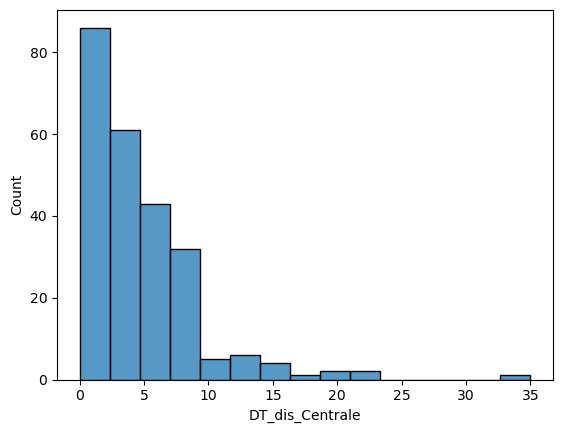

Histogram plot:  DT_dis_laterales


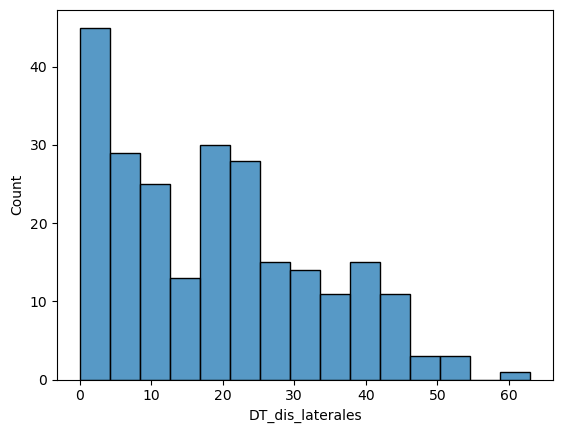

Histogram plot:  DT_dis_quadsupg


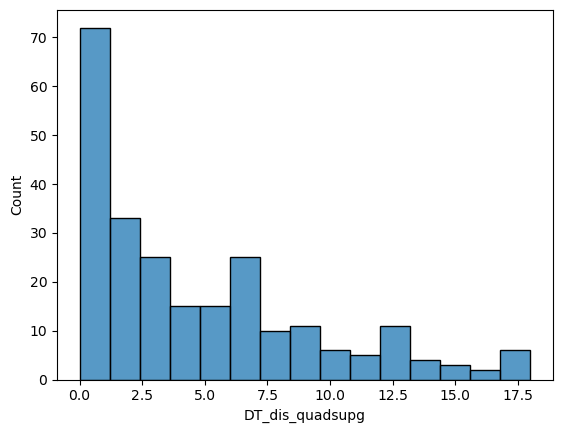

Histogram plot:  DT_dis_quadsupd


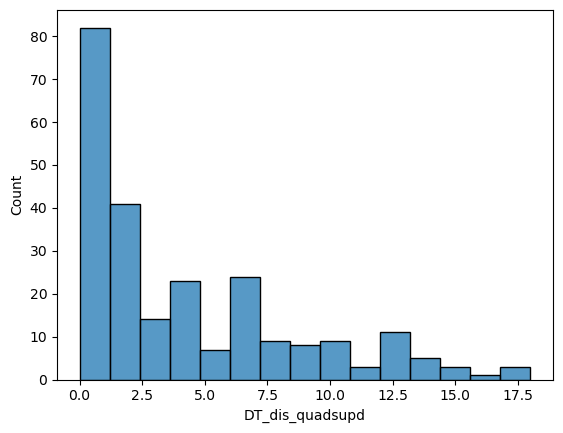

Histogram plot:  DT_dis_quadinfg


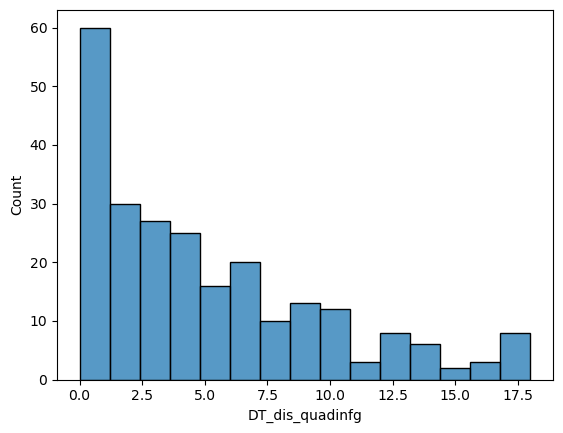

Histogram plot:  DT_dis_quadinfd


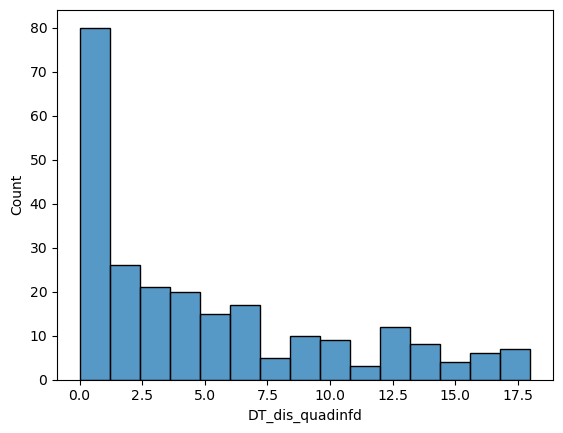

Histogram plot:  DT_dis_Gauche


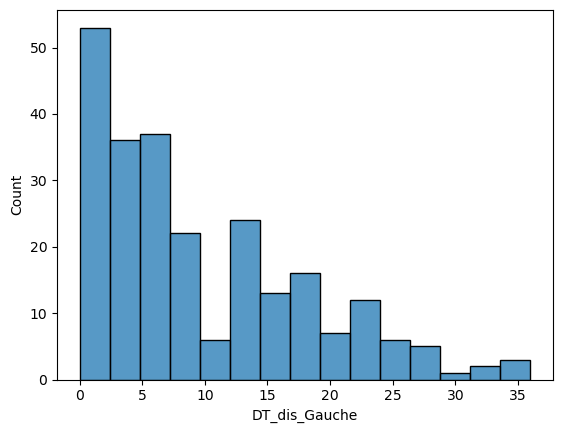

Histogram plot:  DT_dis_Droite


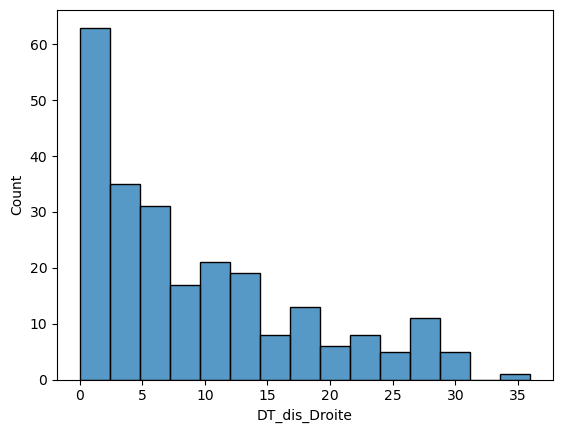

Histogram plot:  Resultat ST


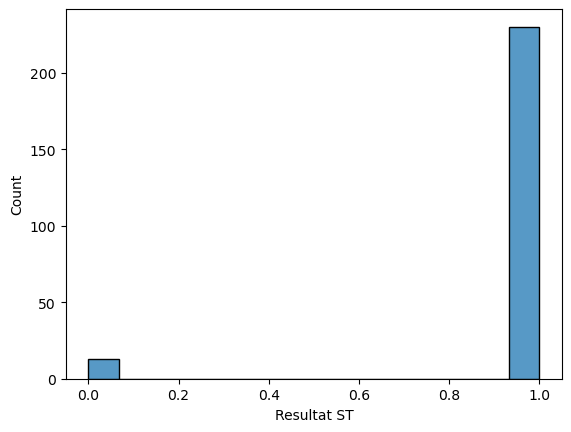

Histogram plot:  Resultat DT Central


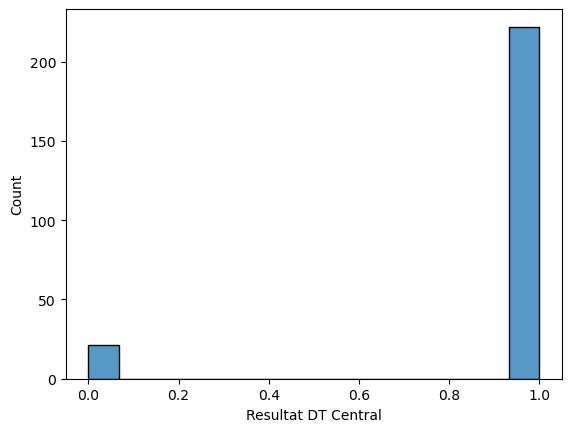

Histogram plot:  Résultat DT latéral


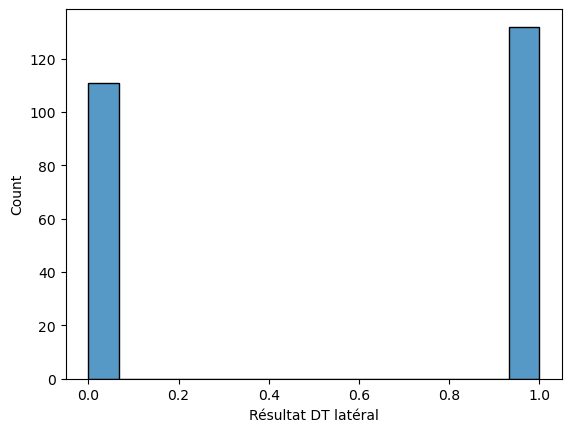

Histogram plot:  Resultat Dis_Centrale


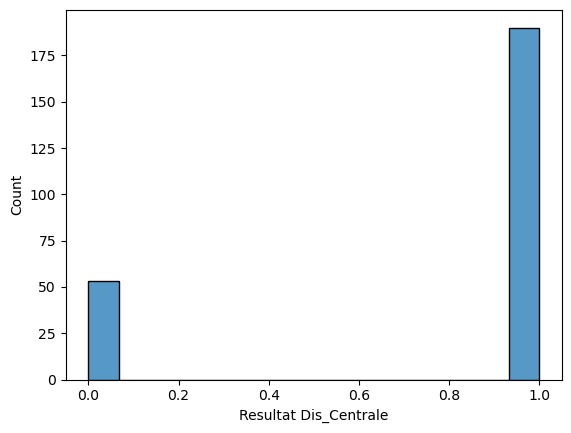

Histogram plot:  Resultat dis_laterales


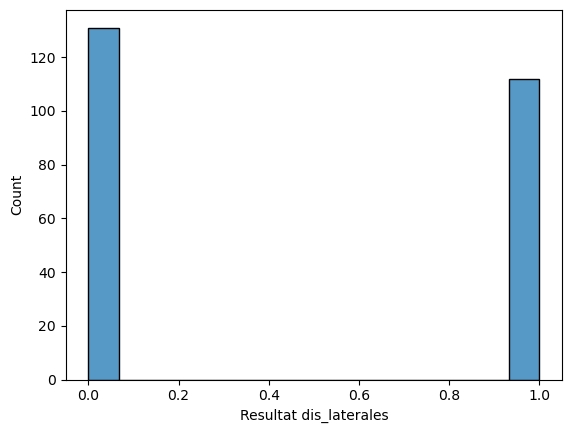

In [30]:
# Remaining Columns
rem_cols = ['DT_quadsupg', 'DT_quadsupd',
       'DT_quadinfg', 'DT_quadinfd', 'DT_Gauche', 'DT_Droite',
       'DT_dis_Centrale', 'DT_dis_laterales', 'DT_dis_quadsupg',
       'DT_dis_quadsupd', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_Gauche', 'DT_dis_Droite', 'Resultat ST', 'Resultat DT Central',
       'Résultat DT latéral', 'Resultat Dis_Centrale',
       'Resultat dis_laterales']
for col in rem_cols:
    print("Histogram plot: ", col)
    sns.histplot(df[col], bins = 15)
    plt.show()

## Features Engineering

In [31]:
# Creating new dataframe called "cleaned_df" to included the cleaned version of the main dataframe/dataset
cleaned_df = pd.DataFrame()

In [32]:
# Encoding the categorical column 'Sexe' where 'F' = 0 and 'H' = 1
cleaned_df['Sexe'] = pd.get_dummies(df.Sexe, drop_first = True)

In [33]:
# Encoding the categorical column 'Etio'
le = LabelEncoder()
cleaned_df['Etio'] = le.fit_transform(df.Etio)

In [34]:
# Encoding the categorical column 'CV'
le = LabelEncoder()
cleaned_df['CV'] = le.fit_transform(df.CV)

In [35]:
# Adding other columns from df dataframe to cleaned_df dataframe
cleaned_df['Age'] = df['Age']
cleaned_df['Esterman'] = df['Esterman']
cleaned_df['ST'] = df['ST']
cleaned_df[['DT_centrale','DT_quadsupd','DT_quadsupg','DT_quadinfg',
            'DT_quadinfd','DT_dis_Centrale','DT_dis_quadinfg',
            'DT_dis_quadinfd','DT_dis_quadsupg','DT_dis_quadsupd']] = df[['DT_centrale','DT_quadsupd','DT_quadsupg','DT_quadinfg',
            'DT_quadinfd','DT_dis_Centrale','DT_dis_quadinfg',
            'DT_dis_quadinfd','DT_dis_quadsupg','DT_dis_quadsupd']]
cleaned_df['Decision'] = df['Decision']

In [36]:
cleaned_df.columns

Index(['Sexe', 'Etio', 'CV', 'Age', 'Esterman', 'ST', 'DT_centrale',
       'DT_quadsupd', 'DT_quadsupg', 'DT_quadinfg', 'DT_quadinfd',
       'DT_dis_Centrale', 'DT_dis_quadinfg', 'DT_dis_quadinfd',
       'DT_dis_quadsupg', 'DT_dis_quadsupd', 'Decision'],
      dtype='object')

In [37]:
len(cleaned_df.columns)

17

In [38]:
# Printing the cleaned_df dataframe
cleaned_df.sample(10)

,Sexe,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd,Decision
227,0,3,7,73,8,0,3,0,2,0,2,3,5,3.0,3,10,Non
232,1,3,8,66,9,1,3,5,3,14,2,1,16,5.0,8,6,Simulateur
165,1,3,3,35,24,0,1,6,0,0,3,2,0,5.0,0,6,Non
89,0,3,2,52,16,0,3,4,3,1,2,7,6,6.0,7,7,Non
223,0,3,7,72,7,0,5,5,2,1,2,3,14,2.0,14,13,Non
44,1,3,2,46,0,1,0,0,0,0,0,1,4,4.0,1,0,Oui
212,0,3,6,29,14,0,2,0,6,0,0,5,3,3.0,2,2,Simulateur
137,1,3,2,48,0,0,0,0,0,2,0,3,2,2.0,2,2,Oui
112,0,0,2,30,17,0,2,1,2,0,0,5,4,2.0,4,6,Oui
200,0,3,5,78,12,3,3,15,4,1,3,3,3,2.0,3,17,Non


In [39]:
cleaned_df.describe()

,Sexe,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,0.596708,2.312757,2.934156,49.806584,13.736626,0.679012,3.975309,2.423868,2.617284,2.473251,2.267490,4.691358,5.102881,5.028807,4.637860,4.259259
std,0.491571,1.161060,2.101698,15.575451,15.952039,0.929238,3.689303,3.602881,3.963369,4.253621,4.211168,4.356932,4.589076,4.974646,4.540967,4.315390
min,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,38.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000,50.000000,8.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,3.000000,3.000000,2.000000
75%,1.000000,3.000000,4.000000,62.000000,23.000000,1.000000,5.000000,3.000000,3.000000,2.500000,2.000000,6.000000,8.000000,8.000000,7.000000,7.000000
max,1.000000,4.000000,8.000000,85.000000,71.000000,5.000000,23.000000,17.000000,18.000000,18.000000,18.000000,35.000000,18.000000,18.000000,18.000000,18.000000


In [40]:
# Checking the output column 'Decision' values
cleaned_df.Decision.value_counts()

Non           128
Oui            90
Simulateur     25
Name: Decision, dtype: int64

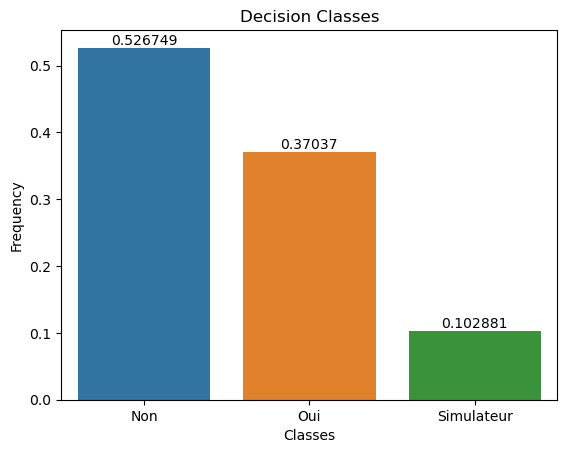

In [41]:
# Plotting target column 'Effect' percentage per class
ax = sns.barplot(x = cleaned_df['Decision'].value_counts().index, y = list(cleaned_df['Decision'].value_counts()/len(df.Decision)))
ax.bar_label(ax.containers[0])
plt.title('Decision Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Encoding the output column 'Decision' as follows:
cleaned_df['Decision'] = cleaned_df['Decision'].replace({'Non': 0, 'Oui': 1, 'Simulateur': 2})

<Axes: >

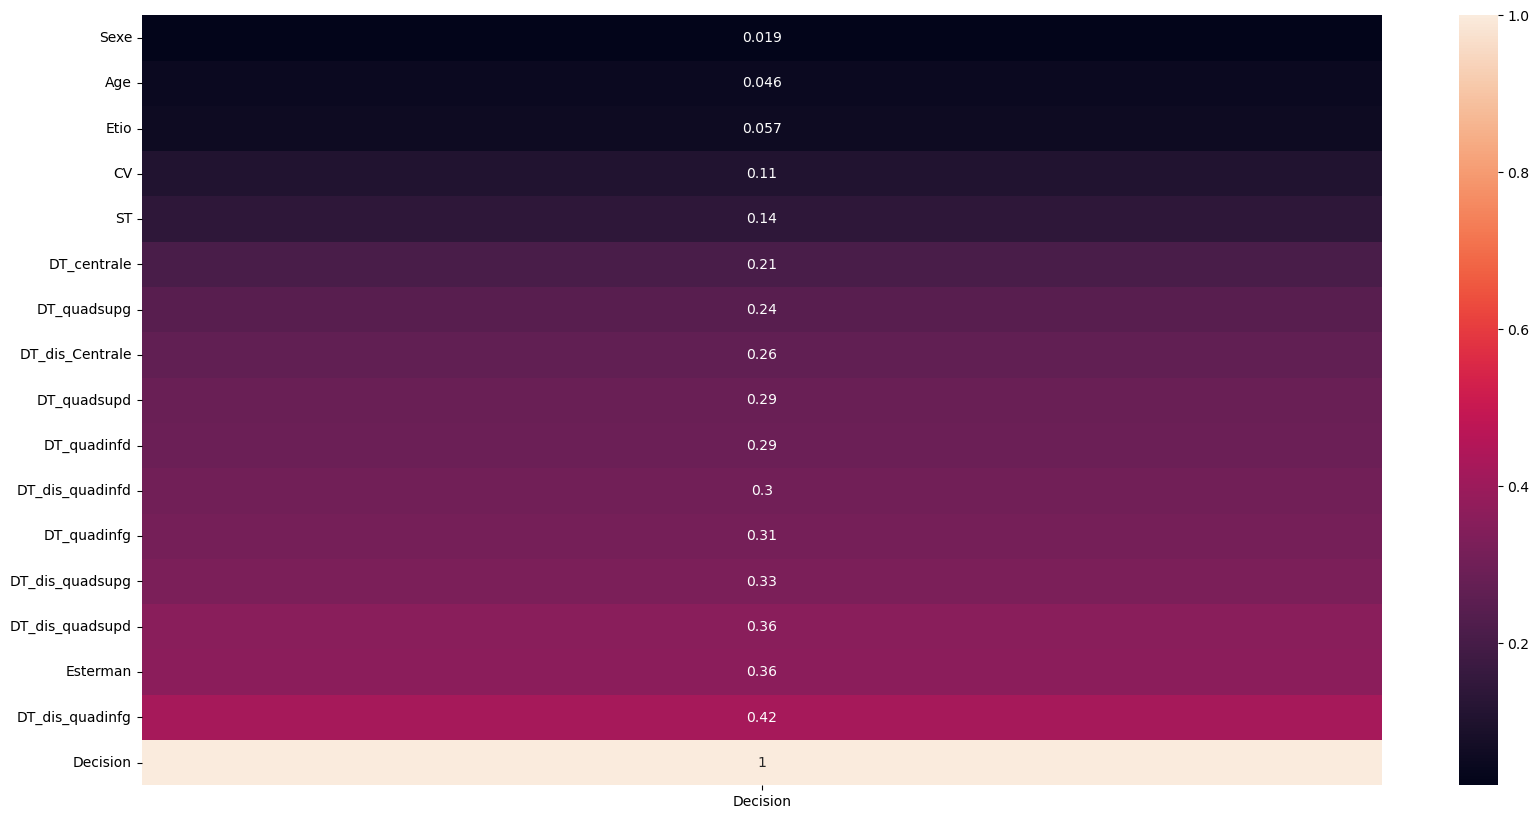

In [43]:
# Checking the correlation of the columns 
plt.figure(figsize=(20,10))
sns.heatmap(cleaned_df.corr().abs()[['Decision']].sort_values(by = 'Decision'), annot = True)

# Building ML Classifcation Models without considering oversampling techniques

In [44]:
# Defining the features and target
features = cleaned_df.drop(columns = ['Decision'])
target = cleaned_df['Decision']

In [45]:
# Splitting the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4)

## Logistic Regression

In [46]:
# Initializing the model LR
mdl_LR = LogisticRegression(max_iter = 3000)

In [47]:
# Fitting the training data to the LR model
mdl_LR.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [48]:
# Getting the intercept and coeffecients values of the LR model
mdl_LR.intercept_, mdl_LR.coef_

(array([-1.72624845,  2.74737766, -1.02112921]),
 array([[ 0.01442298, -0.05507977, -0.00689346, -0.00503929,  0.05626046,
          0.1277641 ,  0.15067553,  0.11764081,  0.05785746, -0.05474546,
         -0.01149582,  0.0444364 ,  0.30483761,  0.08649891, -0.11154948,
          0.03162168],
        [-0.36490212, -0.14263959, -0.18232292,  0.02406256,  0.00105836,
         -0.15080987, -0.04093581, -0.22314541, -0.01138094, -0.05984132,
          0.0154151 , -0.09172105, -0.13620102, -0.14798652, -0.0882278 ,
          0.00699973],
        [ 0.35047914,  0.19771936,  0.18921639, -0.01902327, -0.05731882,
          0.02304577, -0.10973972,  0.10550461, -0.04647652,  0.11458679,
         -0.00391928,  0.04728465, -0.16863659,  0.06148761,  0.19977728,
         -0.03862141]]))

In [49]:
# Testing the LR model on unseen data (test data)
pred_LR = mdl_LR.predict(X_test)

In [50]:
# Accuracy score of LR model
accuracy_score(y_test, pred_LR)

0.7040816326530612

<Axes: >

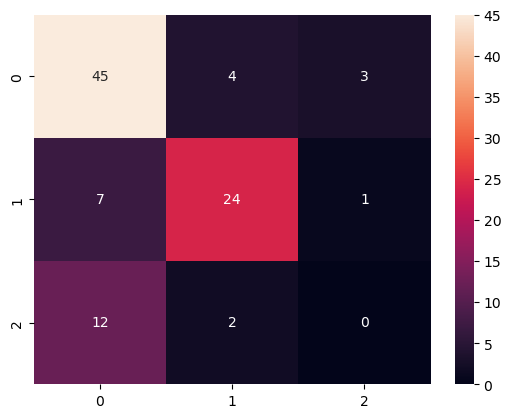

In [51]:
# Confusion matirx of the LR predictions
sns.heatmap(confusion_matrix(y_test, pred_LR), annot = True)

In [52]:
print(metrics.classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78        52
           1       0.80      0.75      0.77        32
           2       0.00      0.00      0.00        14

    accuracy                           0.70        98
   macro avg       0.50      0.54      0.52        98
weighted avg       0.63      0.70      0.66        98



## Decision Tree Classifier

In [53]:
# Intializing the decision tree classifier model
mdl_DT = DecisionTreeClassifier(criterion='entropy')

In [54]:
# Fitting the training data to the DT model
mdl_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
# Testing the DT model on unseen data (test data)
pred_DT = mdl_DT.predict(X_test)

In [56]:
# Accuracy score of DT model
accuracy_score(y_test, pred_DT)

0.6122448979591837

<Axes: >

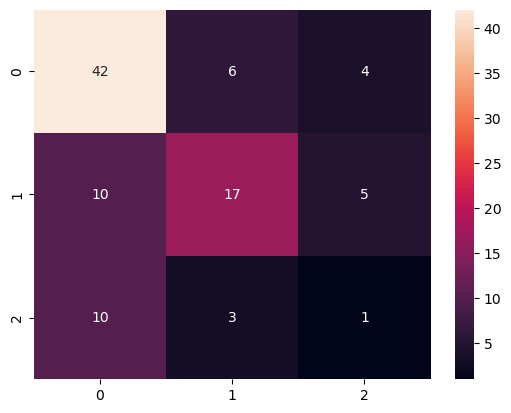

In [57]:
# Confusion matirx of the DT predictions
sns.heatmap(confusion_matrix(y_test, pred_DT), annot = True)

In [58]:
print(metrics.classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        52
           1       0.65      0.53      0.59        32
           2       0.10      0.07      0.08        14

    accuracy                           0.61        98
   macro avg       0.48      0.47      0.47        98
weighted avg       0.59      0.61      0.59        98



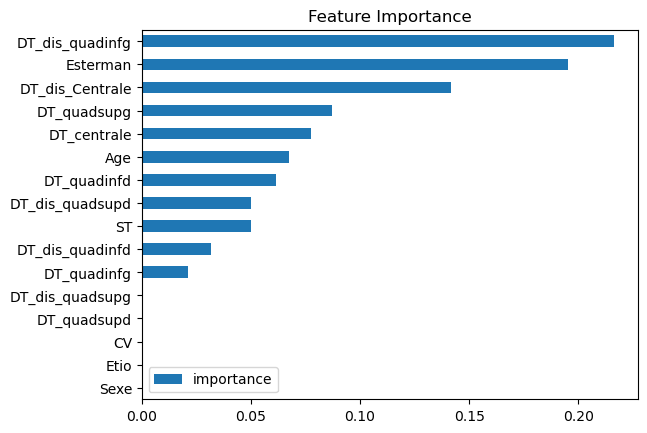

In [59]:
# Getting and plotting feature importance
features_importance = pd.DataFrame(data = mdl_DT.feature_importances_,
             index = mdl_DT.feature_names_in_,
             columns = ['importance'])
features_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## XGBOOST

In [60]:
clf_xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0)

In [61]:
clf_xgb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [62]:
y_pred_xgb = clf_xgb.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_xgb)

0.7142857142857143

<Axes: >

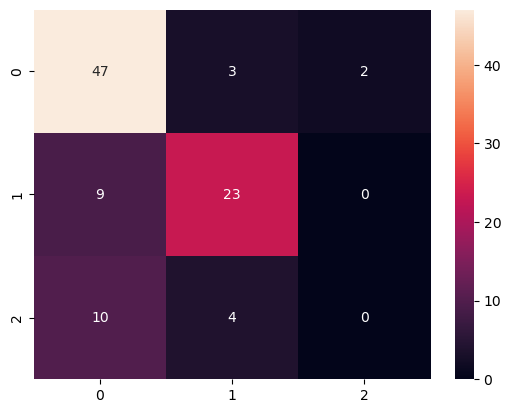

In [64]:
# Confusion matirx of the XGB predictions
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot = True)

In [65]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.71      0.90      0.80        52
           1       0.77      0.72      0.74        32
           2       0.00      0.00      0.00        14

    accuracy                           0.71        98
   macro avg       0.49      0.54      0.51        98
weighted avg       0.63      0.71      0.66        98



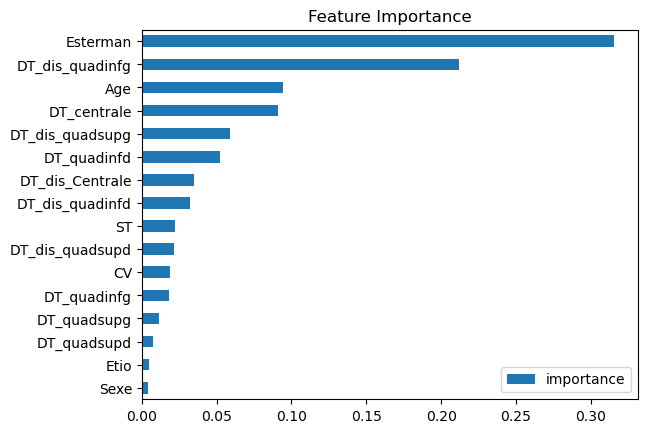

In [66]:
# Getting and plotting feature importance
features_importance = pd.DataFrame(data = clf_xgb.feature_importances_,
             index = clf_xgb.feature_names_in_,
             columns = ['importance'])
features_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## SVM

In [67]:
# Create and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(X_train, y_train)

SVC()

In [68]:
# Testing the SVM model on unseen data (test data)
pred_SVM = svm_classifier.predict(X_test)

In [69]:
accuracy_score(y_test, pred_SVM)

0.7244897959183674

<Axes: >

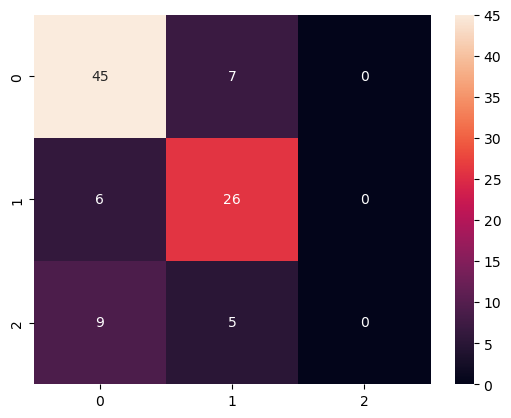

In [70]:
# Confusion matirx of the XGB predictions
sns.heatmap(confusion_matrix(y_test, pred_SVM), annot = True)

In [71]:
print(metrics.classification_report(y_test, pred_SVM, zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        52
           1       0.68      0.81      0.74        32
           2       0.00      0.00      0.00        14

    accuracy                           0.72        98
   macro avg       0.48      0.56      0.52        98
weighted avg       0.62      0.72      0.67        98



## KFOLD CROSS VALIDATION

In [72]:
def KFold_cv(model_):
    
    kf = KFold(n_splits = 5, shuffle = True)
    
    for train, test in kf.split(cleaned_df):

        train_df = cleaned_df.loc[train]
        test_df = cleaned_df.loc[test]
        

        model_.fit(train_df[list(features.columns)], train_df['Decision'])


        y_predictions = model_.predict(test_df[list(features.columns)])

        print(metrics.classification_report(test_df['Decision'], y_predictions, zero_division=0))

In [73]:
#Cross Validation Score

# Initializing the model LR
mdl_LR = LogisticRegression(max_iter = 3000)

# Intializing the decision tree classifier model
mdl_DT = DecisionTreeClassifier(criterion='entropy')

# Intializing the XGBoost classifier model
clf_xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)

list_models = [mdl_LR, mdl_DT, clf_xgb, svm_classifier]

for mdl in list_models:
    print("========================================")
    print("MODEL == > ", mdl )
    KFold_cv(mdl)
    print("========================================")

MODEL == >  LogisticRegression(max_iter=3000)


              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.86      0.86      0.86        21
           2       0.00      0.00      0.00         5

    accuracy                           0.78        49
   macro avg       0.53      0.58      0.55        49
weighted avg       0.72      0.78      0.74        49

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.74      0.81      0.77        21
           2       1.00      0.25      0.40         4

    accuracy                           0.78        49
   macro avg       0.85      0.63      0.66        49
weighted avg       0.79      0.78      0.76        49

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.75      0.88      0.81        17
           2       0.33      0.20      0.25         5

    accuracy        

# Building ML Classifcation Models with SMOTE technique

In [74]:
len(X_train), len(y_train), len(X_test), len(y_test)

(145, 145, 98, 98)

In [75]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({0: 128, 1: 128, 2: 128})


In [76]:
X_resampled

,Sexe,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd
0,0,3,0,33,45,0,3,15,3,4,14,6,10,17.000000,10,12
1,0,3,0,40,48,1,3,2,0,0,0,8,4,5.000000,1,2
2,1,2,0,52,42,0,3,4,1,2,7,6,5,10.000000,3,3
3,1,3,0,37,40,1,1,8,1,0,10,3,6,10.000000,2,11
4,1,0,1,39,47,0,1,0,13,9,1,6,10,1.000000,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,3,3,61,0,1,3,1,0,0,0,2,2,2.718686,0,1
380,1,3,5,47,18,1,2,0,4,2,1,1,3,2.710210,8,1
381,1,1,3,50,6,1,5,0,3,0,0,3,3,6.042189,5,2
382,0,2,2,32,1,1,5,0,0,0,0,9,6,3.014350,3,2


In [77]:
# Splitting the data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.4)

## Logistic Regression

In [78]:
# Initializing the model LR
mdl_LR_2 = LogisticRegression(max_iter = 3000)

In [79]:
# Fitting the training data to the LR model
mdl_LR_2.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [80]:
# Getting the intercept and coeffecients values of the LR model
mdl_LR_2.intercept_, mdl_LR_2.coef_

(array([-2.42764065,  2.98711571, -0.55947506]),
 array([[ 0.53531163,  0.18358375, -0.05214625, -0.01500251, -0.00321256,
          0.21372049,  0.03207061,  0.18508256,  0.22251112,  0.02891091,
          0.07531431,  0.0737756 ,  0.23076103,  0.07220524, -0.07604933,
          0.08230038],
        [-0.3155565 , -0.00857342, -0.21854137,  0.00544256,  0.00130434,
         -0.20679769,  0.0086148 , -0.27297679, -0.05614973, -0.17298609,
          0.05812237, -0.08144713, -0.01531217, -0.22310565, -0.08342414,
         -0.06637422],
        [-0.21975513, -0.17501034,  0.27068762,  0.00955995,  0.00190823,
         -0.0069228 , -0.04068541,  0.08789422, -0.1663614 ,  0.14407517,
         -0.13343668,  0.00767154, -0.21544886,  0.15090041,  0.15947347,
         -0.01592617]]))

In [81]:
# Testing the LR model on unseen data (test data)
pred_LR = mdl_LR_2.predict(X_test)

In [82]:
# Accuracy score of LR model
accuracy_score(y_test, pred_LR)

0.6818181818181818

In [83]:
len(y_test), len(pred_LR)

(154, 154)

<Axes: >

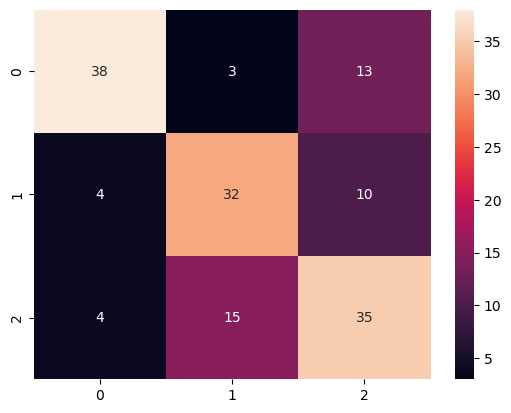

In [84]:
# Confusion matirx of the LR predictions
sns.heatmap(confusion_matrix(y_test, pred_LR), annot = True)

In [85]:
print(metrics.classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        54
           1       0.64      0.70      0.67        46
           2       0.60      0.65      0.62        54

    accuracy                           0.68       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.69      0.68      0.68       154



## SVM

In [86]:
# Create and train the SVM classifier
svm_classifier_2 = SVC(kernel='rbf', C=1.0)
svm_classifier_2.fit(X_train, y_train)

SVC()

In [88]:
# Testing the SVM model on unseen data (test data)
pred_SVM = svm_classifier_2.predict(X_test)
import joblib

joblib.dump(svm_classifier_2, 'model.pkl')


['model.pkl']

In [89]:
accuracy_score(y_test, pred_SVM)

0.6753246753246753

In [90]:
X_train

,Sexe,Etio,CV,Age,Esterman,ST,DT_centrale,DT_quadsupd,DT_quadsupg,DT_quadinfg,DT_quadinfd,DT_dis_Centrale,DT_dis_quadinfg,DT_dis_quadinfd,DT_dis_quadsupg,DT_dis_quadsupd
100,0,3,2,55,1,0,5,0,0,0,0,4,1,1.000000,3,1
46,1,3,2,62,0,0,1,0,1,0,0,4,3,1.000000,1,1
117,1,0,2,38,0,0,8,1,1,0,0,3,3,0.000000,1,0
139,1,3,2,49,5,3,10,5,1,5,1,6,7,10.000000,6,7
95,1,2,2,55,0,1,4,0,1,0,1,2,1,1.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0,3,2,63,0,0,3,0,0,0,0,3,1,1.907566,1,0
114,0,0,2,21,1,2,1,0,0,0,0,2,2,4.000000,3,2
230,1,3,8,63,22,0,13,2,3,9,3,16,14,6.000000,9,4
19,0,2,0,53,34,0,4,13,3,1,5,3,3,8.000000,3,14
